# Text Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [2]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#  Visualize the data:
Since we're not ready to do anything with the message text, let's see if we can predict ham/spam labels based on message length and punctuation counts. We'll look at message `length` first:

In [3]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

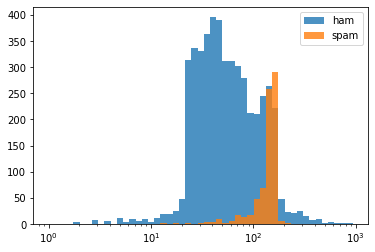

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [5]:
# Create Feature and Label sets
X = df[['message']]  # note the double set of brackets
y = df['label']


tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [1, 5572]

___
# Train a Logistic Regression classifier
One of the simplest multi-class classification tools is [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Scikit-learn offers a variety of algorithmic solvers; we'll use [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS). 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics

# Create a prediction set:
predictions = lr_model.predict(X_test)


# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
print(df)

In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

# Sentiment Analysis
Now that we've seen word vectors we can start to investigate sentiment analysis. The goal is to find commonalities between documents, with the understanding that similarly *combined* vectors should correspond to similar sentiments.

While the scope of sentiment analysis is very broad, we will focus our work in two ways.

### 1. Polarity classification
We won't try to determine if a sentence is objective or subjective, fact or opinion. Rather, we care only if the text expresses a *positive*, *negative* or *neutral* opinion.
### 2. Document level scope
We'll also try to aggregate all of the sentences in a document or paragraph, to arrive at an overall opinion.
### 3. Coarse analysis
We won't try to perform a fine-grained analysis that would determine the degree of positivity/negativity. That is, we're not trying to guess how many stars a reviewer awarded, just whether the review was positive or negative.

## Broad Steps:
* First, consider the text being analyzed. A model trained on paragraph-long movie reviews might not be effective on tweets. Make sure to use an appropriate model for the task at hand.
* Next, decide the type of analysis to perform. In the previous section on text classification we used a bag-of-words technique that considered only single tokens, or *unigrams*. Some rudimentary sentiment analysis models go one step further, and consider two-word combinations, or *bigrams*. In this section, we'd like to work with complete sentences, and for this we're going to import a trained NLTK lexicon called *VADER*.

## NLTK's VADER module
VADER is an NLTK module that provides sentiment scores based on words used ("completely" boosts a score, while "slightly" reduces it), on capitalization & punctuation ("GREAT!!!" is stronger than "great."), and negations (words like "isn't" and "doesn't" affect the outcome).
<br>To view the source code visit https://www.nltk.org/_modules/nltk/sentiment/vader.html

In [6]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SaniyaJaswani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER's `SentimentIntensityAnalyzer()` takes in a string and returns a dictionary of scores in each of four categories:
* negative
* neutral
* positive
* compound *(computed by normalizing the scores above)*

In [7]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [8]:
a = 'This was the worst film to ever disgrace the screen.'
sid.polarity_scores(a)

{'neg': 0.477, 'neu': 0.523, 'pos': 0.0, 'compound': -0.8074}

## Use VADER to analyze Amazon Reviews


In [9]:
df = pd.read_csv('amazonreviews.tsv', sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [10]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64